In [1]:
import numpy as np
import pandas as pd


In [2]:
customers=pd.read_csv('olist_customers_dataset.csv')

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# Find number of missing values
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

There are no missing values

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

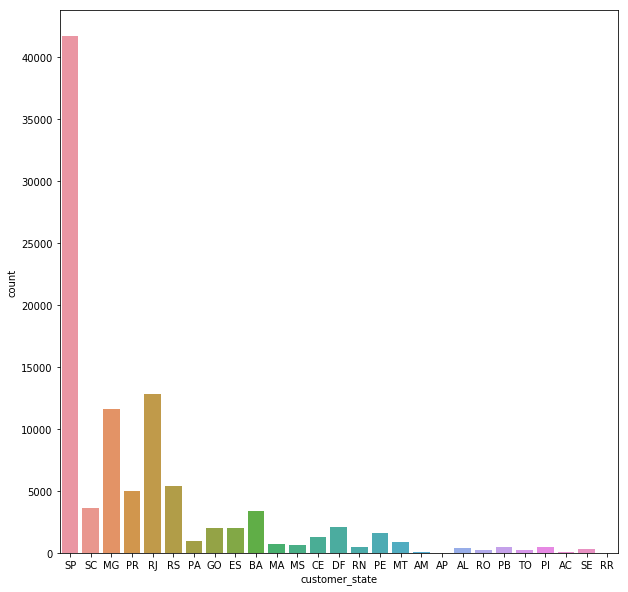

In [52]:
# Univariate Analysis
plt.figure(figsize=(10,10))
sns.countplot(x=customers.customer_state)
plt.show()

SP has the highest number of customers followed by RJ, MG, RS, and PR

In [59]:
# Within SP state, which city has the highest number of customers
sns.countplot(customers.loc[customers.customer_state=='SP'].groupby(by='customer_city').count())
plt.show()

ValueError: could not broadcast input array from shape (629,4) into shape (629)

In [8]:
customers.shape

(99441, 5)

In [10]:
customers.customer_state.nunique()

27

In [31]:
help(pd.DataFrame.groupby)

Help on function groupby in module pandas.core.generic:

groupby(self, by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, observed=False, **kwargs)
    Group DataFrame or Series using a mapper or by a Series of columns.
    
    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.
    
    Parameters
    ----------
    by : mapping, function, label, or list of labels
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``.align()`` method). If an ndarray is passed, the
        values are used as-is determine the groups. A label or list of
        l

['customer_state', 'customer_unique_id']